In [ ]:
# Support Vector Machines (SVM)
# Examples: SVM (for classification), SVR (for regression).
# Classification: Predicts a discrete class label (e.g., yes/no, spam/ham).
# Regression: Predicts a continuous numerical value (e.g., house price, temperature).

# Characteristics: Maximize the margin between classes or data points.

In [ ]:
# Support Vector Regression (SVR)
# SVR is a regression model that works by finding a function that fits the data within a specified margin of tolerance. It is especially useful when:

# The relationship between independent and dependent variables is nonlinear.
# You want to minimize overfitting while keeping the model flexible.

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
# Importing the dataset
# The code predicts salary based on position level using the SVR model.
dataset = pd.read_csv(r"C:\Users\user\Position_Salaries.csv")

In [75]:
D = dataset.iloc[:, :].values
print(D)
# Position	, Level , 	Salary

[['Business Analyst' 1 45000]
 ['Junior Consultant' 2 50000]
 ['Senior Consultant' 3 60000]
 ['Manager' 4 80000]
 ['Country Manager' 5 110000]
 ['Region Manager' 6 150000]
 ['Partner' 7 200000]
 ['Senior Partner' 8 300000]
 ['C-level' 9 500000]
 ['CEO' 10 1000000]]


In [76]:
X = dataset.iloc[:, 1:-1].values
# level
# :: Selects all rows.
# 1:-1: Refers to the columns starting from index 1 up to, but not including, the last column (-1).
# In this dataset:
# Column index 0: "Position" (not included)
# Column index 1: "Level" (included)
# Column index 2: "Salary" (excluded)
print(X)
 # independent variable (X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [77]:
y = dataset.iloc[:, -1].values
print(y)
# dependent variable (y)
# salary

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [78]:
y = y.reshape(len(y),1)
# StandardScaler expects its input to have two dimensions: rows (samples) and columns (features).
# X already has the correct shape (n_samples, n_features).
# y should have shape (n,1) to match X row-wise.
print(y)
# salary

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [79]:
# Feature Scaling
# The goal of feature scaling is to standardize the data so that it is centered around 0 and has a standard deviation of 1, which helps many machine learning models (like SVR) perform better.
from sklearn.preprocessing import StandardScaler
# StandardScaler is a preprocessing tool from sklearn that standardizes features
# Formula used: z= (x−μ)/σ  ,where μ is the mean and σ is the standard deviation of the feature.
sc_X = StandardScaler()
# scale the independent variable X
sc_y = StandardScaler()
 # scale the dependent variable y
X = sc_X.fit_transform(X)
# Applies the scaling formula to each value in 𝑋, converting it into a standardized value.
# eg;   Original X = [[1], [2], [3]]
# Mean = 2, Std Dev = 1
# Transformed X = [[-1], [0], [1]]
y = sc_y.fit_transform(y)
# Applies the scaling formula to each value in y, converting it into a standardized value.

In [80]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [81]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [82]:
# Training the SVR model on the whole dataset
from sklearn.svm import SVR
# SVR (Support Vector Regression): A regression technique from sklearn based on Support Vector Machines (SVMs).

regressor = SVR(kernel='rbf')
# The Radial Basis Function (RBF) kernel is a popular choice for non-linear regression problems.
regressor.fit(X, y.ravel()) 
# SVR uses the scaled X and  y to find a regression function that minimizes prediction error while adhering to the kernel's constraints.
# Input Requirements:
# X: A 2D array of shape (n_samples, n_features)—already scaled earlier.
# y: A 1D array of shape (n_samples,).
# .ravel() converts y from a 2D array with shape (n_samples, 1) to a 1D array with shape (n_samples,).

SVR()

In [83]:

# Predicting a new result
predicted_scaled = regressor.predict(sc_X.transform([[6.5]])) 
# This predicts the scaled output for the input X=6.5. The result is a 1D array.
predicted_original = sc_y.inverse_transform(predicted_scaled.reshape(-1, 1)) 
# regressor.predict() returns a 1D array while sc_y.inverse_transform() expects a 2D array. You need to reshape the output of regressor.predict() before passing it to sc_y.inverse_transform().
# reshape(-1, 1)
# -1:
# The -1 is a placeholder that tells NumPy to automatically calculate the appropriate number of rows based on the total number of elements in the array.
# 1:
# This explicitly specifies that the reshaped array should have exactly 1 column.

print("Predicted Salary:", predicted_original[0][0])
# predicted_original[0][0] - We are accessing the value from the predicted_original array, which is a 2D array  with 1 row and 1 column , and extracting the scalar value from it. 


Predicted Salary: 170370.02040650236


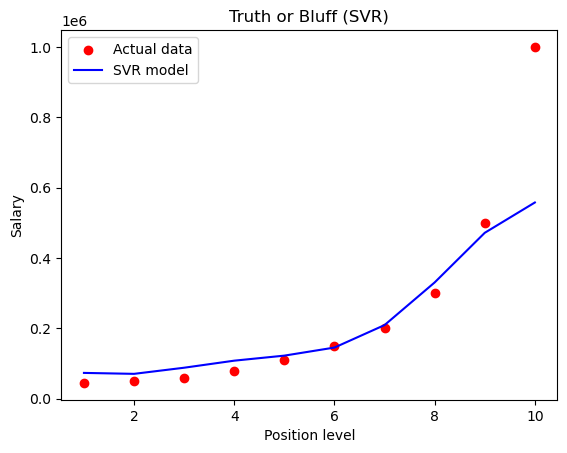

In [84]:
# Visualising the SVR results
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red', label='Actual data')
# sc_X.inverse_transform(X)-We apply the inverse transformation to X to revert the feature scaling for the input data (Position level), so it appears in the original scale.
# sc_y.inverse_transform(y): Similarly, we inverse the scaling on y to revert the salary values to the original scale.


plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color = 'blue', label='SVR model') 
# plt.plot(...): This line plots the regression curve for the Support Vector Regression (SVR) model.
# sc_X.inverse_transform(X): Again, we revert the feature scaling on X to get the actual position levels on the x-axis.
# regressor.predict(X): We use the trained SVR model to predict the salary values for the given X (position levels).
# reshape(-1, 1): The prediction is a 1D array, but sc_y.inverse_transform() requires a 2D array, so we reshape the predicted array to (n_samples, 1).
# sc_y.inverse_transform(...): After reshaping, we inverse the scaling on the predicted salary values.


plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()


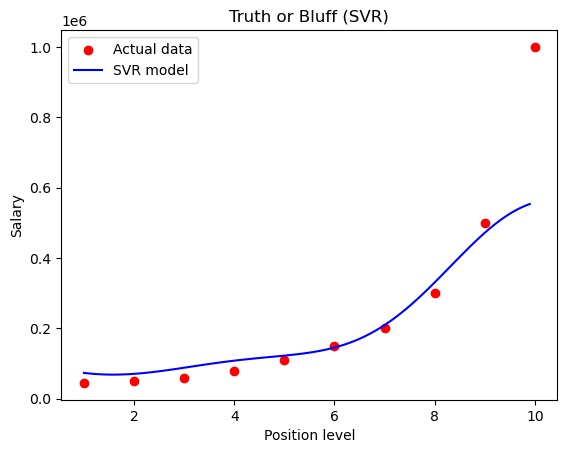

In [87]:
# Visualising the SVR results (for higher resolution and smoother curve)
# First, we inverse transform X to get the actual positions in the original scale
X_transformed = sc_X.inverse_transform(X)
# Purpose: This line inverts the scaling applied to the feature X (position levels).
# Function: The feature scaling (e.g., using StandardScaler) transforms the input features into a new range. To visualize the data on the original scale (before scaling), we use inverse_transform() to revert it to the original scale.


# Flatten the array to make sure min and max work properly on a 1D array
X_transformed_flat = X_transformed.flatten()
# Purpose: Flatten the 2D array X_transformed into a 1D array.
# Function: Since X_transformed is likely a 2D array (with each row representing a feature), flatten() converts it into a 1D array, making it easier to apply min() and max() for range calculations.


# Create a higher resolution grid for X values for smoother curve
X_grid = np.arange(min(X_transformed_flat), max(X_transformed_flat), 0.1)
# Function: This generates a set of values between the minimum and maximum of the transformed data, with a step size of 0.1. These values will be used to create a smooth curve for the SVR model.



X_grid = X_grid.reshape((len(X_grid), 1))  # Reshape for prediction (2D array)
# Function: The SVR model expects the input to be a 2D array (e.g., a single feature with multiple samples) for making predictions, so we reshape the X_grid array into the appropriate shape of (len(X_grid), 1).


# Scatter plot for actual data points
plt.scatter(X_transformed_flat, sc_y.inverse_transform(y), color = 'red', label='Actual data')
# Purpose: Plot the actual data points (position level vs. salary).
# Function: This plots the actual data as red dots. X_transformed_flat is the position levels (on the original scale), and sc_y.inverse_transform(y) converts the scaled salaries back to the original scale. color = 'red' sets the color of the points, and label='Actual data' adds a label to the legend.

# Plotting the SVR regression curve

plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color = 'blue', label='SVR model')
# X_grid- The x-axis values used for the plot are indeed the X_grid, which is 2D. But the plt.plot() function expects the x argument to be 1D. Fortunately, plt.plot() can automatically handle this, so you don't need to manually flatten the X_grid when plotting.

# sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1))- yaxis values
# sc_X.transform(X_grid) applies the same scaling transformation to the X_grid data points.
# regressor.predict(...) uses the trained Support Vector Regression (SVR) model to predict the salary for each X_grid value.
# .reshape(-1, 1) reshapes the predicted result to match the required 2D format for sc_y.inverse_transform().
# sc_y.inverse_transform(...) reverts the scaling of the predicted salaries back to the original scale.


# Adding title and labels
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()
